In [ ]:
"""
Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.
Dataset Description:
The dataset consists of the following variables:
Age: Age in years
KM: Accumulated Kilometers on odometer
FuelType: Fuel Type (Petrol, Diesel, CNG)
HP: Horse Power
Automatic: Automatic ( (Yes=1, No=0)
CC: Cylinder Volume in cubic centimeters
Doors: Number of doors
Weight: Weight in Kilograms
Quarterly_Tax: 
Price: Offer Price in EUROs
Taskes:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.
2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5.Apply Lasso and Ridge methods on the model.

"""

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r"ToyotaCorolla - MLR.csv")

In [4]:
df


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [6]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
print(df.dtypes)

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object


In [9]:
df_encoded = pd.get_dummies(df, drop_first=True)
numeric_df = df.select_dtypes(include='number')

In [10]:
corr = numeric_df.corr()

In [83]:
corr

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


In [84]:
corr.shape

(10, 10)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

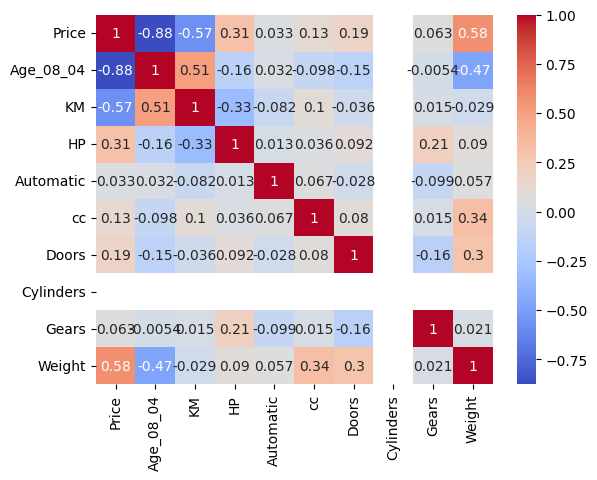

In [13]:
# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Training and testing

In [14]:
import sklearn
from sklearn.model_selection import train_test_split

In [15]:
X=df_encoded.drop('Price',axis=1)
y=df['Price']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (1148, 11)
Test set: (288, 11)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [19]:
lr=LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
lr.score(X_test, y_test)

0.8348888040611084

In [21]:
coeffs1 = pd.Series(lr.coef_, index=X.columns)

In [22]:
coeffs1

Age_08_04          -1.208305e+02
KM                 -1.623141e-02
HP                  1.403948e+01
Automatic           1.488309e+02
cc                 -3.037219e-02
Doors              -6.031097e+01
Cylinders           1.250555e-12
Gears               5.516007e+02
Weight              2.588496e+01
Fuel_Type_Diesel   -6.854876e+01
Fuel_Type_Petrol    1.370809e+03
dtype: float64

In [23]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [24]:
y_pred=lr.predict(X_test)

In [ ]:
y_pred

In [34]:
#R2_score
r2 = r2_score(y_test, y_pred)

In [35]:
r2

0.8348888040611084

In [36]:
#Mean abs error
mae = mean_absolute_error(y_test, y_pred)

In [37]:
mae

990.8872739193923

In [38]:
#Mean square error
mse = mean_squared_error(y_test, y_pred)

In [31]:
mse

2203043.8231437006

In [39]:
#Root mean squared error
rmse = np.sqrt(mse)

In [40]:
rmse

np.float64(1484.2654153296508)

In [41]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
lasso = Lasso(alpha=1.0)  # alpha is the regularization strength
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

In [ ]:
# Evaluate

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Lasso Regression Performance:")
print(f"R²    : {r2_score(y_test, y_pred_lasso):.4f}")
print(f"MAE   : {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"RMSE  : {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}")


Lasso Regression Performance:
R²    : 0.8351
MAE   : 991.02
RMSE  : 1483.24


In [45]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

print("Ridge Regression Performance:")
print(f"R²    : {r2_score(y_test, y_pred_ridge):.4f}")
print(f"MAE   : {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"RMSE  : {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")


Ridge Regression Performance:
R²    : 0.8350
MAE   : 990.86
RMSE  : 1483.56


In [ ]:
#MODEL-2

In [46]:
import numpy as np   
import pandas as pd   
import matplotlib.pyplot as plt   
import seaborn as sns

In [47]:
df=pd.read_csv(r"ToyotaCorolla - MLR.csv")

In [48]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [49]:
X=df[['Age_08_04','KM','HP','cc','Cylinders','Gears','Weight']]
y=df['Price']

In [50]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (1148, 7)
Test set: (288, 7)


In [52]:
lr=LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
r2=lr.score(X_test,y_test)

In [56]:
print('model 2 r2 score is:',r2)

model 2 r2 score is: 0.8517118444220816


In [57]:
coeffs1 = pd.Series(lr.coef_, index=X.columns)

In [58]:
print("Model 1 Coefficients:\n", coeffs1)

Model 1 Coefficients:
 Age_08_04   -1.198751e+02
KM          -2.040608e-02
HP           2.744235e+01
cc          -1.004018e-01
Cylinders    4.618528e-14
Gears        5.718298e+02
Weight       2.010954e+01
dtype: float64


In [59]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred=lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
y_pred=lr.predict(X_test)
y_pred


In [62]:
r2 = r2_score(y_test, y_pred)
r2

0.8517118444220816

In [63]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [64]:
mae

995.8511932984574

In [65]:
mse

1978577.547898163

In [66]:
rmse

np.float64(1406.619190789804)

In [67]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
lasso = Lasso(alpha=1.0)  # alpha is the regularization strength
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

In [ ]:
# Evaluate

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print("Lasso Regression Performance:")
print(f"R²    : {r2_score(y_test, y_pred_lasso):.4f}")
print(f"MAE   : {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"RMSE  : {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}")

Lasso Regression Performance:
R²    : 0.8517
MAE   : 995.85
RMSE  : 1406.50


In [71]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

print("Ridge Regression Performance:")
print(f"R²    : {r2_score(y_test, y_pred_ridge):.4f}")
print(f"MAE   : {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"RMSE  : {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")

Ridge Regression Performance:
R²    : 0.8517
MAE   : 995.78
RMSE  : 1406.68


In [ ]:
#MODEL-3

In [73]:
df=pd.read_csv(r"ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [74]:
selected_features = ['HP', 'Weight']
if 'Fuel_Type_Diesel' in X_train.columns:
    selected_features.append('Fuel_Type_Diesel')
if 'Automatic_1' in X_train.columns:
    selected_features.append('Automatic_1')

X_train = X_train[selected_features]
X_test = X_test[selected_features]

model3 = LinearRegression()
model3.fit(X_train, y_train)

print("Model 3 R² score:", model3.score(X_test, y_test))

coeffs3 = pd.Series(model3.coef_, index=selected_features)
print("Model 3 Coefficients:\n", coeffs3)

Model 3 R² score: 0.3953434153201274
Model 3 Coefficients:
 HP        65.055286
Weight    40.151254
dtype: float64


In [75]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [76]:
y_pred=model3.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [77]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [78]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
lasso = Lasso(alpha=1.0)  # alpha is the regularization strength
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

In [ ]:
#Evaluate

In [80]:
print("Lasso Regression Performance:")
print(f"R²    : {r2_score(y_test, y_pred_lasso):.4f}")
print(f"MAE   : {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"RMSE  : {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}")

Lasso Regression Performance:
R²    : 0.3954
MAE   : 2115.19
RMSE  : 2840.19


In [81]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

In [82]:
print("Ridge Regression Performance:")
print(f"R²    : {r2_score(y_test, y_pred_ridge):.4f}")
print(f"MAE   : {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"RMSE  : {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")

Ridge Regression Performance:
R²    : 0.3955
MAE   : 2115.19
RMSE  : 2840.07


In [ ]:
#Interview Questions:

1.What is Normalization & Standardization and how is it helpful?

ANS:- Normalization:-Normalization rescales the values of features to a fixed range — usually 0 to 1.
It’s particularly useful when data doesn’t follow a normal distribution and when algorithms use distance-based calculations,
such as K-Nearest Neighbors (KNN) or Neural Networks.
    
Standardization :- Standardization transforms data so that it has a mean of 0 and a standard deviation of 1.
This method is preferred when the data follows a normal (Gaussian) distribution and is used in algorithms like
Linear Regression, Logistic Regression, and Support Vector Machines (SVM).

    #How normalization and Standardization are helpful
    Normalization and standardization help “clean and balance” your data so that all features have equal importance,
models train faster, and predictions become more accurate.


In [ ]:
2.What techniques can be used to address multicollinearity in multiple linear regression?

Ans:- “If multicollinearity exists in a regression model, I would first detect it using the Variance Inflation Factor (VIF). 
Then, I could address it by removing or combining correlated predictors, applying dimensionality reduction techniques like PCA,
or using regularization methods such as Ridge or Lasso regression to stabilize the coefficient estimates.”